
# Hydrogen bonds between protein domains

In this example we will identify the hydrogen bonds between the p-Helix
and the selecivity filter of the channel protein KcsA (PDB: 2KB1).
The structure was resolved using NMR, so multiple models are present
in the structure.
Hence, we can also calculate the frequency of each bond.


/home/guillem_ares/miniconda3/lib/python3.11/site-packages/biotite/structure/hbond.py:245: UserWarning: Input structure has no associated 'BondList', Hydrogen atoms bonded to donors are detected by distance
  warnings.warn(


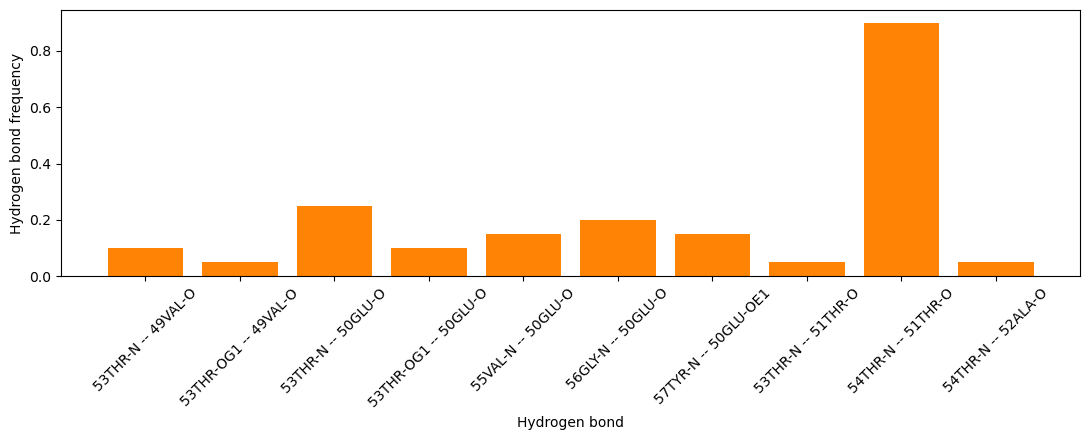

In [1]:
# Code source: Daniel Bauer
# License: BSD 3 clause

from tempfile import gettempdir
import matplotlib.pyplot as plt
import biotite
import biotite.structure as struc
import biotite.structure.io as strucio
import biotite.database.rcsb as rcsb


file_name = rcsb.fetch("2KB1", "mmtf", gettempdir())
stack = strucio.load_structure(file_name)
# Four identical chains, consider only chain A
chain_a = stack[:, stack.chain_id == "A"]
# Selection for p-helix
p_helix = (chain_a.res_id >= 40) & (chain_a.res_id <= 52)
# Selection for selectivity filter
sf = (chain_a.res_id >= 53) & (chain_a.res_id <= 58)

# Calculate the hydrogen bonds and the frequency of each bond
triplets, mask = struc.hbond(chain_a, selection1=p_helix, selection2=sf)
freq = struc.hbond_frequency(mask)

# Create names of bonds
label = "{d_resid}{d_resnm}-{d_a} -- {a_resid}{a_resnm}-{a_a}"
names = [label.format(
    d_resid=chain_a.res_id[donor],
    d_resnm=chain_a.res_name[donor],
    d_a=chain_a.atom_name[donor],
    a_resid=chain_a.res_id[acceptor],
    a_resnm=chain_a.res_name[acceptor],
    a_a=chain_a.atom_name[acceptor]
    ) for donor, _, acceptor in triplets]

plt.subplots(figsize=(11,4.5))
plt.bar(names, freq, color=biotite.colors["orange"])
plt.xlabel("Hydrogen bond")
plt.ylabel("Hydrogen bond frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()